# Creating a Filter, Edge Detection

### Import resources and display image

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np
import os

%matplotlib inline

In [10]:
DATA_PATH = "data"

In [11]:
def display_img(path_to_file,resize=None):
    # Read in the image
    image = mpimg.imread(path_to_file)
    if not resize is None:
         image = cv2.resize(image, resize)

    plt.imshow(image)
    return image

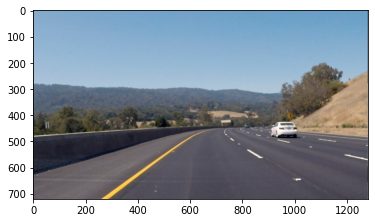

In [12]:
lane_img = "curved_lane.jpg"
image_car = display_img(os.path.join(DATA_PATH, lane_img))

### Convert the image to grayscale

In [13]:
def convert_to_grayscale(image):
    # Convert to grayscale for filtering
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    plt.imshow(gray, cmap='gray')
    return gray

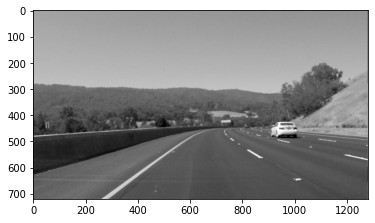

In [14]:
gray_car = convert_to_grayscale(image_car)

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="./data/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

In [15]:
def apply_filter(image, filter_to_apply):
    # Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
    filtered_image = cv2.filter2D(image, -1, filter_to_apply)

    plt.imshow(filtered_image, cmap='gray')

In [16]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                    [  0,  0,  0], 
                    [  1,  2,  1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

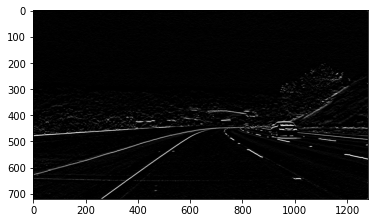

In [17]:
apply_filter(gray_car, sobel_y)

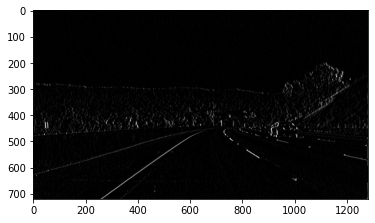

In [18]:
apply_filter(gray_car, sobel_x)

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



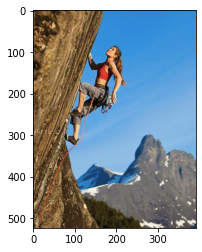

In [19]:
climbing_img = "climbing.jpg"
img_woman = display_img(os.path.join(DATA_PATH, climbing_img))

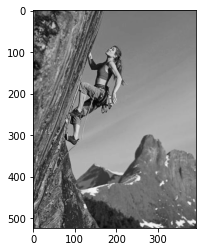

In [20]:
gray_woman = convert_to_grayscale(img_woman)

In [21]:
# Create the filters :) 
# Horizontal Filter edge detection
horiz_filter = np.array([[ -1.5, -2.5, -1.5, -2.5, -1.5], 
                         [ -2.5, -3.5, -2.5, -3.5, -2.5],
                         [  0,      0,    0,    0,    0],
                         [  2.5,  3.5,  2.5,  3.5,  2.5],
                         [  1.5,  2.5,  1.5,  2.5,  1.5], 
                        ])

# Vertical Filter Edge Detection
vertical_filter = np.array( [[ -0.5, -0.1, 0, 0.1, 0.5], 
                             [ -0.3, -0.2, 0, 0.2, 0.3],
                             [ -0.1, -0.3, 0, 0.3, 0.1], 
                             [ -0.3, -0.2, 0, 0.2, 0.3], 
                             [ -0.5, -0.1, 0, 0.1, 0.5],])

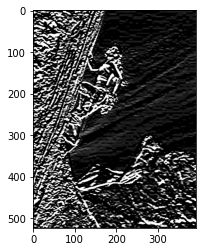

In [22]:
apply_filter(gray_woman, horiz_filter)

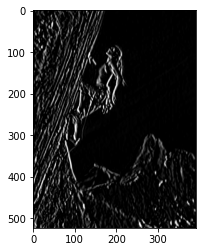

In [23]:
apply_filter(gray_woman, vertical_filter)

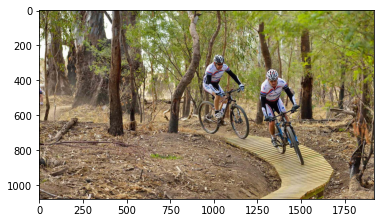

In [24]:
bike_img = "mountain_bike.jpg"
img_bike = display_img(os.path.join(DATA_PATH, bike_img))


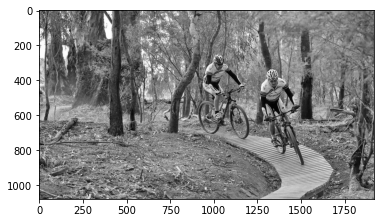

In [25]:
gray_bike = convert_to_grayscale(img_bike)

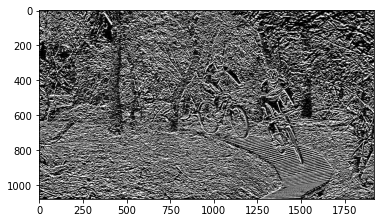

In [26]:
curve_filter = np.array([[    0,     0,    0, -1.5, -1.5], 
                         [ -1.5,  -1.5,    0, -1.5, -1.5],
                         [ -1.0,  -1.0,    0,  1.0,  1.5],
                         [  1.5,   1.5,    0,  1.5,  1.5],
                         [    0,     0,    0,  1.5,  1.5], 
                        ])
apply_filter(gray_bike, horiz_filter)

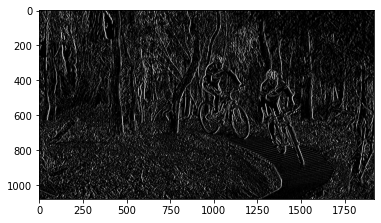

In [27]:
apply_filter(gray_bike, vertical_filter)